<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here

# Fill missing Employment and RemoteWork with "Unknown"
df['Employment'].fillna('Unknown', inplace=True)
df['RemoteWork'].fillna('Unknown', inplace=True)

# Drop rows where JobSat or YearsCodePro is missing (essential for analysis)
df = df.dropna(subset=['JobSat', 'YearsCodePro'])

# Convert YearsCodePro to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

/tmp/ipykernel_1250/2844776218.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna('Unknown', inplace=True)
/tmp/ipykernel_1250/2844776218.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_1250/86262084.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median()
/tmp/ipykernel_1250/86262084.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_satisfaction.index, y=median_satisfaction.values, palette='coolwarm')


ExperienceRange
0-5 years      7.0
5-10 years     7.0
10-20 years    7.0
20+ years      8.0
Name: JobSat, dtype: float64


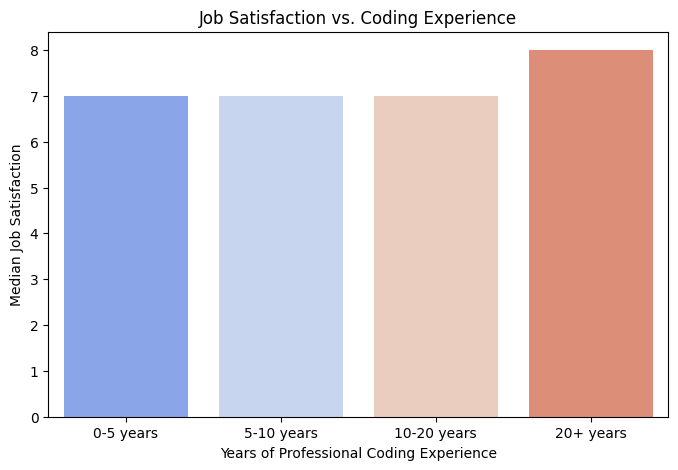

In [4]:
## Write your code here

#Create Experience Ranges

# Define experience ranges
bins = [0, 5, 10, 20, float('inf')]  # Categories: 0-5, 5-10, 10-20, 20+
labels = ['0-5 years', '5-10 years', '10-20 years', '20+ years']

# Categorize experience
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

#Calculate Median Job Satisfaction  
# Convert JobSat to numeric scores (if categorical)
df['JobSat'] = df['JobSat'].astype('category').cat.codes

# Group by experience range and calculate median job satisfaction
median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median()
print(median_satisfaction)

#Visualize the Relationship  
import matplotlib.pyplot as plt
import seaborn as sns

# Plot median job satisfaction per experience range
plt.figure(figsize=(8, 5))
sns.barplot(x=median_satisfaction.index, y=median_satisfaction.values, palette='coolwarm')

plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Median Job Satisfaction")
plt.title("Job Satisfaction vs. Coding Experience")
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


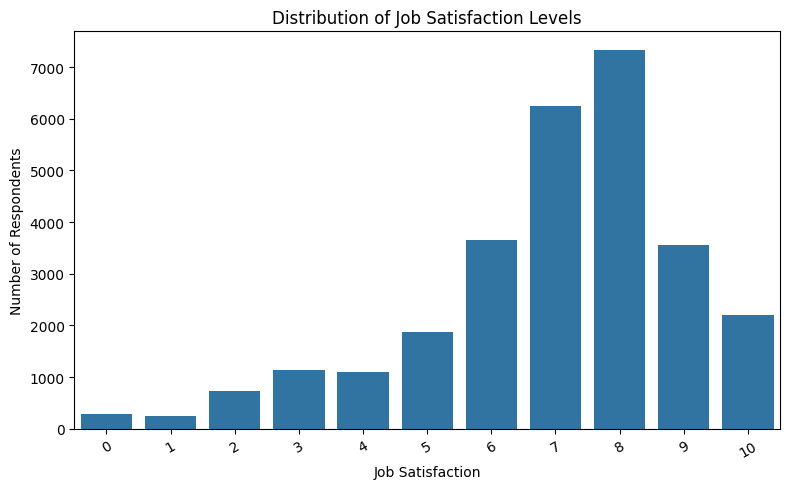

In [5]:
## Write your code here

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='JobSat')

plt.title("Distribution of Job Satisfaction Levels")
plt.xlabel("Job Satisfaction")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_1250/1863312301.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index, palette="muted")


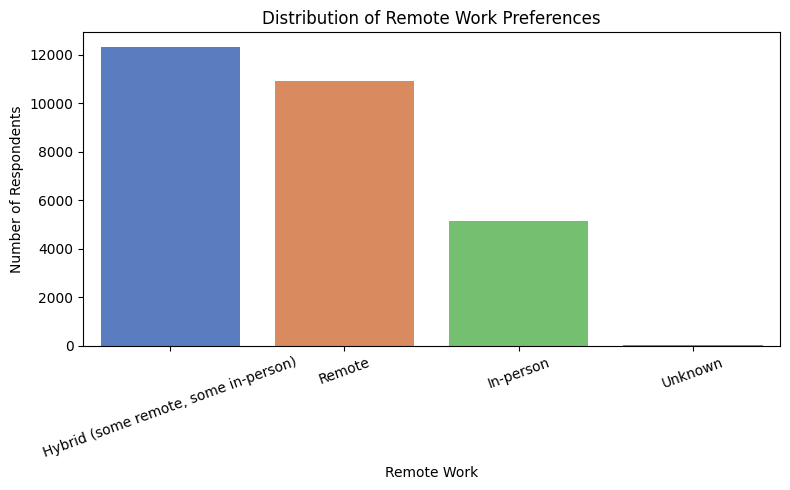

Remote Work Preferences by Employment Type (Counts):
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                 9752   
Employed, full-time;Employed, part-time                                               48   
Employed, full-time;Independent contractor, fre...                                   800   
Employed, full-time;Independent contractor, fre...                                    52   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Independent contractor, free...                                     1   
Student, full-time;Not employed, but looking fo...                                     1   
Student, full-time;Not empl

In [6]:
## Write your code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows where RemoteWork or Employment is missing
df = df.dropna(subset=['RemoteWork', 'Employment'])

# ====== 1. Count Plot of Remote Work Preferences ======
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index, palette="muted")
plt.title("Distribution of Remote Work Preferences")
plt.xlabel("Remote Work")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# ====== 2. Cross-tabulate RemoteWork by Employment Type ======
employment_remote = pd.crosstab(df['Employment'], df['RemoteWork'])

print("Remote Work Preferences by Employment Type (Counts):")
print(employment_remote)

print("\nRemote Work Preferences by Employment Type (%):")

# ====== 3. Cross-tabulate RemoteWork by Job Roles (DevType) ======
# Note: DevType may have multiple roles per respondent separated by ';'
# We'll simplify and take only the first listed role for analysis
df['PrimaryRole'] = df['DevType'].dropna().apply(lambda x: x.split(';')[0] if isinstance(x, str) else x)

role_remote = pd.crosstab(df['PrimaryRole'], df['RemoteWork'])

print("\nRemote Work Preferences by Primary Job Role (Counts):")
print(role_remote)

print("\nRemote Work Preferences by Primary Job Role (%):")

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


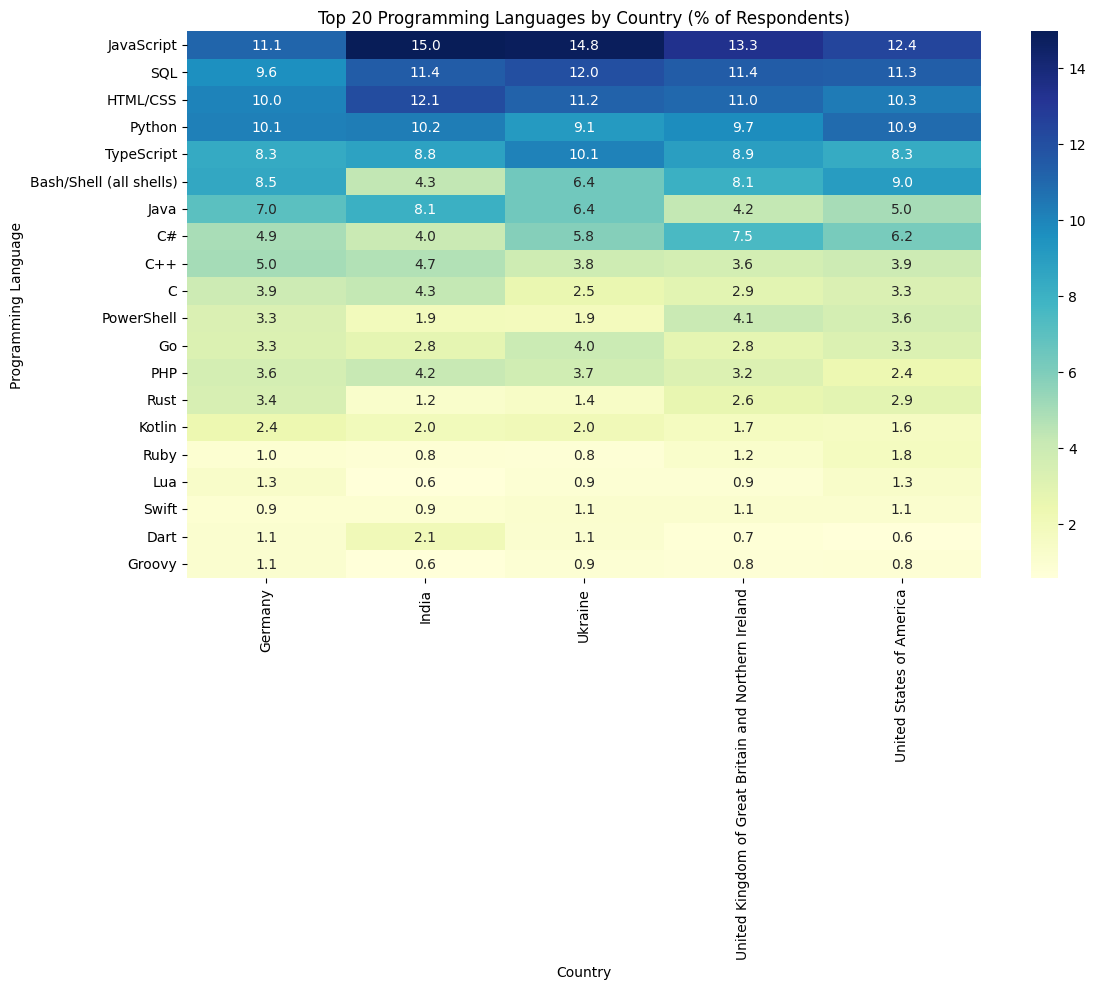

In [7]:
## Write your code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Keep necessary columns
df_lang = df[['Country', 'LanguageHaveWorkedWith']].dropna()

# Step 2: Convert semicolon-separated strings to lists
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')

# Step 3: Explode into long format
df_lang = df_lang.explode('LanguageHaveWorkedWith')

# Step 4: Rename for clarity
df_lang.rename(columns={'LanguageHaveWorkedWith': 'Language'}, inplace=True)

# Step 5: Group and count usage by Country and Language
language_counts = df_lang.groupby(['Country', 'Language']).size().reset_index(name='Count')

# Step 6: Filter for top 5 countries by response volume
top_countries = df['Country'].value_counts().head(5).index.tolist()
filtered = language_counts[language_counts['Country'].isin(top_countries)]

# Step 7: Create pivot table (languages as rows, countries as columns)
pivot_table = filtered.pivot_table(index='Language', columns='Country', values='Count', fill_value=0)

# Step 8: Filter to top 20 languages by total usage across countries
top_languages = pivot_table.sum(axis=1).sort_values(ascending=False).head(20).index
pivot_top = pivot_table.loc[top_languages]

# Step 9: Normalize counts by country (column-wise %)
pivot_norm = pivot_top.div(pivot_top.sum(axis=0), axis=1) * 100

# Step 10: Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_norm, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Top 20 Programming Languages by Country (% of Respondents)")
plt.xlabel("Country")
plt.ylabel("Programming Language")
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


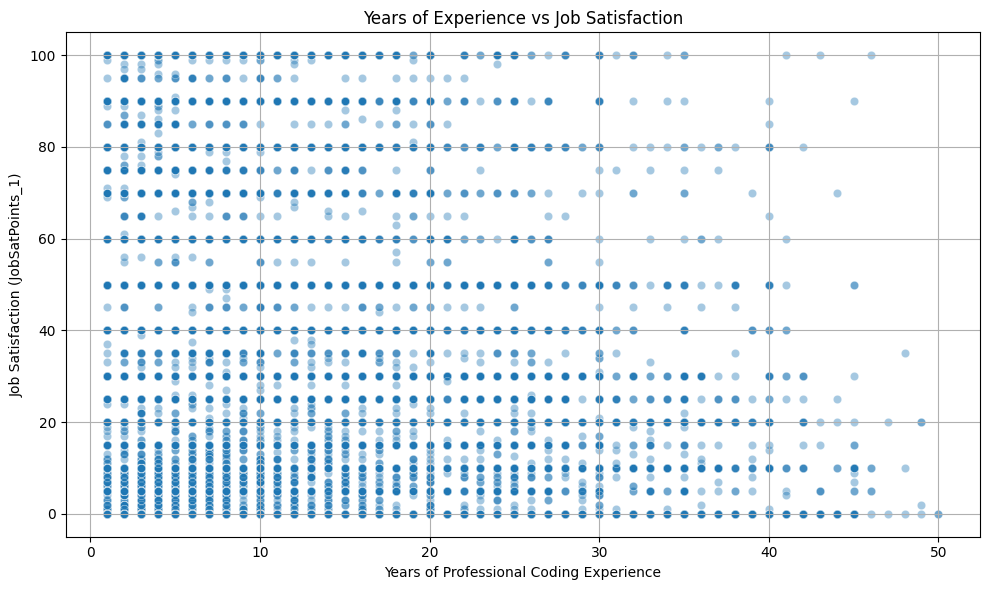

In [8]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean and convert YearsCodePro
def convert_experience(val):
    if pd.isnull(val):
        return None
    elif val == "Less than 1 year":
        return 0.5
    elif val == "More than 50 years":
        return 51
    try:
        return float(val)
    except:
        return None

df['YearsCodePro_clean'] = df['YearsCodePro'].apply(convert_experience)

# Step 2: Ensure JobSatPoints_1 is numeric
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

# Step 3: Drop rows with missing values in either column
df_filtered = df.dropna(subset=['YearsCodePro_clean', 'JobSatPoints_1'])

# Step 4: Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='YearsCodePro_clean', y='JobSatPoints_1', alpha=0.4)
plt.title("Years of Experience vs Job Satisfaction")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction (JobSatPoints_1)")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


EdLevel                                             Associate degree (A.A., A.S., etc.)  \
Employment                                                                                
Employed, full-time                                                                 655   
Employed, full-time;Employed, part-time                                               6   
Employed, full-time;Independent contractor, fre...                                   72   
Employed, full-time;Independent contractor, fre...                                    7   
Employed, full-time;Independent contractor, fre...                                    0   
...                                                                                 ...   
Student, full-time;Independent contractor, free...                                    0   
Student, full-time;Not employed, but looking fo...                                    0   
Student, full-time;Not employed, but looking fo...                                    0   

/tmp/ipykernel_1250/1264013063.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


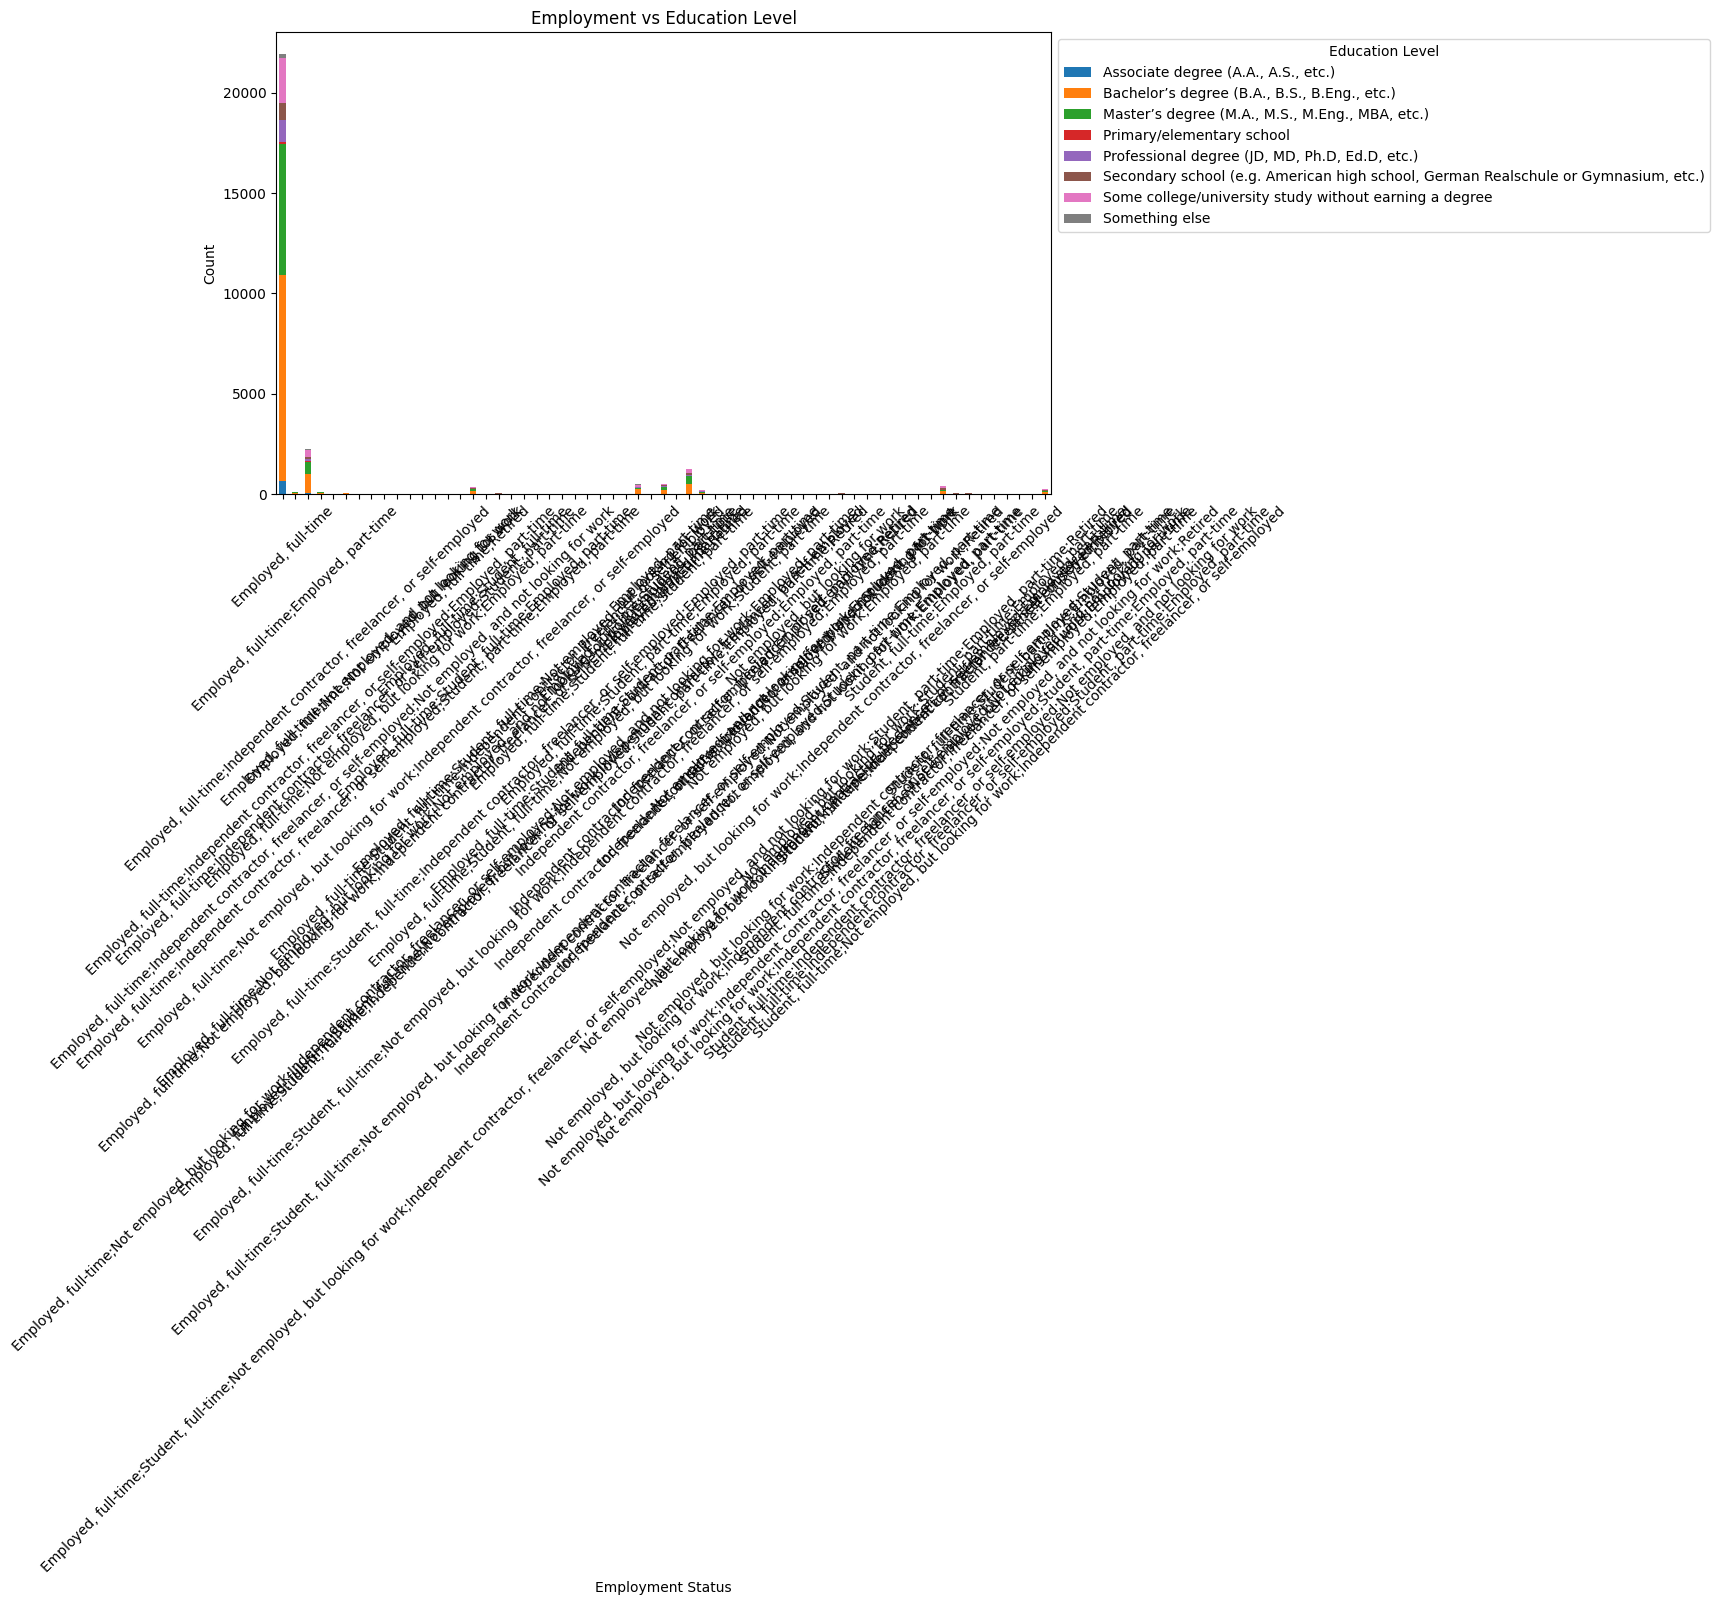

In [9]:
## Write your code here
# Create cross-tabulation between Employment and Education Level
employment_education_crosstab = pd.crosstab(df['Employment'], df['EdLevel'])
print(employment_education_crosstab)

#Visualize the Cross-Tabulation with a Stacked Bar Plot
import matplotlib.pyplot as plt

# Plot a stacked bar chart
employment_education_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize plot
plt.title('Employment vs Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Education Level', bbox_to_anchor=(1, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [10]:
## Write your code here

df.to_csv('modified_dataset.csv', index=False) 

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
